In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [70]:
X1 = np.random.multivariate_normal([3, 5], [[1, 0.1], [0.1, 1]], 1000)

In [71]:
X2 = np.random.multivariate_normal([12, 3], [[12, 0.1], [0.1, 1]], 1000)

In [72]:
X = np.concatenate((X1, X2))

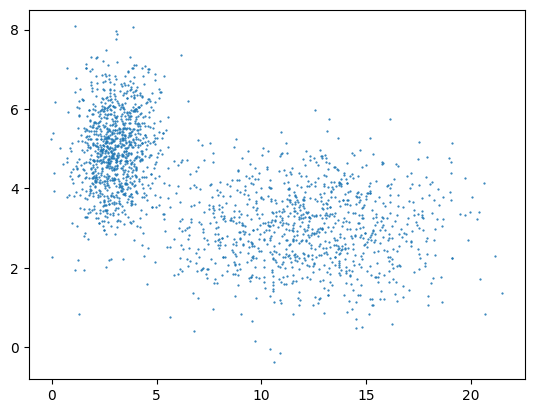

In [73]:
plt.scatter(X[:, 0], X[:, 1], s=0.3)

In [146]:
# E-M algorithm
import numpy as np

e_m_steps = 5
n_clusters = 3
prior = np.ones(n_clusters) / n_clusters

# Init clusters
clusters = {}
x_extent = X[:, 0].min(), X[:, 0].max()
y_extent = X[:, 1].min(), X[:, 1].max()
for i in range(n_clusters):
    mu_x, mu_y = np.random.random(2)
    mu_x = (x_extent[1] - x_extent[0]) * mu_x + x_extent[0]
    mu_y = (y_extent[1] - y_extent[0]) * mu_y + y_extent[0]
    cov = np.array([[1, 0], [0, 1]])
    clusters.update({i: (np.array([mu_x, mu_y]), cov)})


# For visualizing clusters
grid_num = 101
im = np.zeros((grid_num, grid_num, e_m_steps, n_clusters))
N, d = X.shape

In [147]:
for i in range(e_m_steps):
    densities = np.zeros((N, len(clusters)))
    for ic, cluster in clusters.items():
        print(f"Cluster {ic}: {cluster}")
        mu, cov = cluster

        # Visualize cluster
        xs = np.linspace(*x_extent, grid_num)
        ys = np.linspace(*y_extent, grid_num)
        xx, yy = np.meshgrid(xs, ys)
        mg = np.dstack((xx, yy))
        densities_vis = multivariate_normal.pdf(mg, mu, cov)
        im[:, :, i, ic] = densities_vis / densities_vis.max()
        
        # Forward probabilities (E)
        densities[:, ic] = multivariate_normal.pdf(X, mu, cov) # Probability x_i given cluster a

    norm = (densities * prior.T).sum(axis=1)
    for ic, cluster in clusters.items():
        mu, cov = cluster
        # Posterior probabilities
        posterior = (densities[:, ic] * prior[ic]) / norm # Probability cluster a given x_i

        mu = (np.expand_dims(posterior, 1) * X).sum(axis=0) / posterior.sum()
        x_diff = X - mu
        t = posterior / (N * prior[ic])
        cov = (np.expand_dims(t, 1) * x_diff).T @ x_diff + np.eye(d) * 1e-6

        clusters[ic] = (mu, cov)

Cluster 0: (array([6.03897712, 2.12033152]), array([[1, 0],
       [0, 1]]))
Cluster 1: (array([9.16485747, 1.87421749]), array([[1, 0],
       [0, 1]]))
Cluster 2: (array([6.94946058, 0.90929547]), array([[1, 0],
       [0, 1]]))
Cluster 0: (array([3.277546  , 4.85254203]), array([[ 3.12689936, -0.50470521],
       [-0.50470521,  2.02145293]]))
Cluster 1: (array([12.85885166,  3.00506166]), array([[10.50648754, -0.01299075],
       [-0.01299075,  1.30376112]]))
Cluster 2: (array([7.21237991, 2.40368641]), array([[ 0.07725774, -0.01116249],
       [-0.01116249,  0.04053636]]))
Cluster 0: (array([3.16208916, 4.91283626]), array([[ 2.3892855 , -0.14389033],
       [-0.14389033,  1.80560084]]))
Cluster 1: (array([12.62624484,  3.00655742]), array([[12.49792052, -0.0464177 ],
       [-0.0464177 ,  1.37015606]]))
Cluster 2: (array([7.24317765, 2.37441754]), array([[ 0.01165717, -0.00040729],
       [-0.00040729,  0.00623911]]))
Cluster 0: (array([3.09996736, 4.94331703]), array([[1.98461431

In [143]:
densities

array([[1.82394104e-55, 1.17897861e-10, 2.45420269e-73],
       [4.15411197e-70, 2.08320789e-22, 1.82750376e-89],
       [3.00908578e-57, 3.66306793e-11, 2.14128613e-75],
       ...,
       [1.79229815e-07, 8.55669053e-12, 2.91742786e-14],
       [3.86844389e-58, 6.14490275e-17, 6.72474320e-76],
       [1.24450381e-18, 1.06444936e-08, 5.42141767e-29]])

In [144]:
(densities * prior.T).sum(axis=1)

array([3.92992871e-11, 6.94402631e-23, 1.22102264e-11, ...,
       5.97461336e-08, 2.04830092e-17, 3.54816454e-09])

In [134]:
densities

array([[     0.       ,      0.       ,      0.       ],
       [     0.       ,      0.       ,      0.       ],
       [     0.       ,      0.       ,      0.       ],
       ...,
       [     0.       ,      0.       , 159154.9430919],
       [     0.       ,      0.       ,      0.       ],
       [     0.       ,      0.       ,      0.       ]])

In [96]:
mu

array([17.70545083,  3.24614343])

In [97]:
print(cov_b)

[[14.91449734  0.23259146]
 [ 0.23259146  1.07431921]]


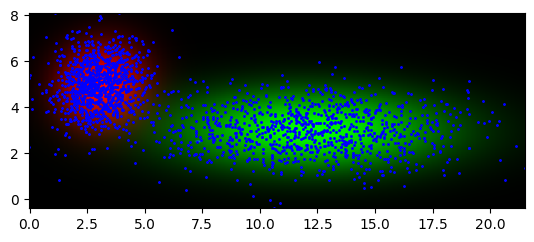

In [148]:
for i in range(e_m_steps):
    plt.scatter(X[:, 0], X[:, 1], c='blue', s=0.3)
    plt.imshow(im[:, :, i, :]/im[:,:,i,:].max(), extent=(*x_extent, *y_extent), origin='lower')
    plt.xlim(*x_extent)
    plt.ylim(*y_extent)
    plt.savefig(f"e_m_{i}.png")

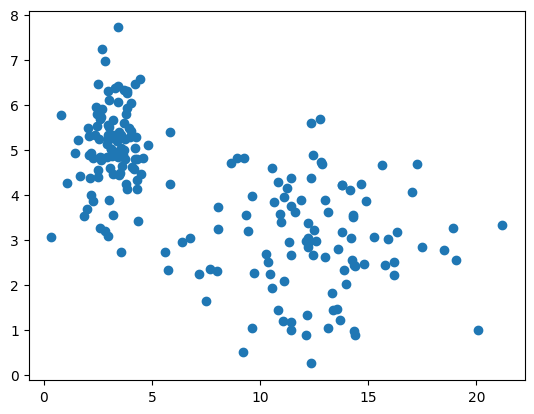

In [77]:
plt.scatter(X[:,0],X[:,1])